# Plotting in Matplotlib

We've asked you to make a lot of plots without talking much about the how and why of making plots. Use this notebook as a reference for creating different kinds of plots and if you'd like to beautify your plots!

Different kinds of data need different plots, and it is up to you to decide the best way to convey the important information in your datasets. We'll demo several different plot types here, including a couple more advanced techniques. Let's go ahead though and import our plotting library, $\texttt{matplotlib}$ and our data-parsing libraries $\texttt{numpy}$ and $\texttt{pandas}$. We'll also set up our Google Colab environment.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive/')
os.chdir('/content/drive/Shareddrives/AST207/data')

Mounted at /content/drive/


## Plot Appearance

This section here might technically be a more advanced technique sequence, so feel free to hide it by clicking the litlte down arrow next to 'Plot Appearance.' But this section will help you beautify your plots.

### Dimensions and Resolution

We want plots that are large, easy to read, and useful for various print and digital purposes. We're going to set teh default plot size and resolution as follows, using the rcParams function within $\texttt{matplotlib}$ (there are actually a lot of things you can set in here as defaults, so play around with the tab completion to see what other parameters you can set!)

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 100 #'dpi' = 'dots per inch'; save high resolution images for better printing and presentation outcomes

### Colors

$\texttt{matplotlib}$ has a default color cycle - that is, the colors it will use for lines, dots, etc. follow a default pattern that is as follows, depending on if you have V1 or V2 (most of us should have V2 at this point):

![CycleURL](https://matplotlib.org/stable/_images/users-prev_whats_new-dflt_style_changes-1.png)

Which... you know... it's a fine color cycle... But it could be so. much. nicer! You can actually define which colors you want by setting them individually (by looking up accepted $\href{https://matplotlib.org/stable/gallery/color/named_colors.html}{\text{color names}}$, $\href{https://g.co/kgs/odiwfV8}{\text{RGB values or Hexadecimal Values}}$) or by generating them from other [colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) in ``matplotlib``. I prefer this method. My favorite maps to generate cycles from are Viridis, Plasma, and Spectral:

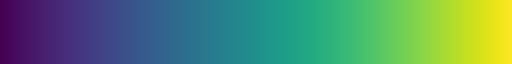

In [ ]:
plt.get_cmap('viridis')

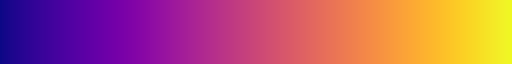

In [ ]:
plt.get_cmap('plasma')

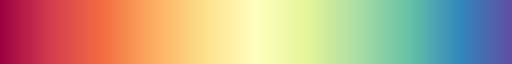

In [ ]:
plt.get_cmap('Spectral')

Let's repeat the activity from an earlier class notebook of plotting a line. I'll first plot a series of lines with the original color cycle, then we'll set the new color cycle using the Spectral color map.

In [ ]:
def linear(x,m,b):
  return m*x + b

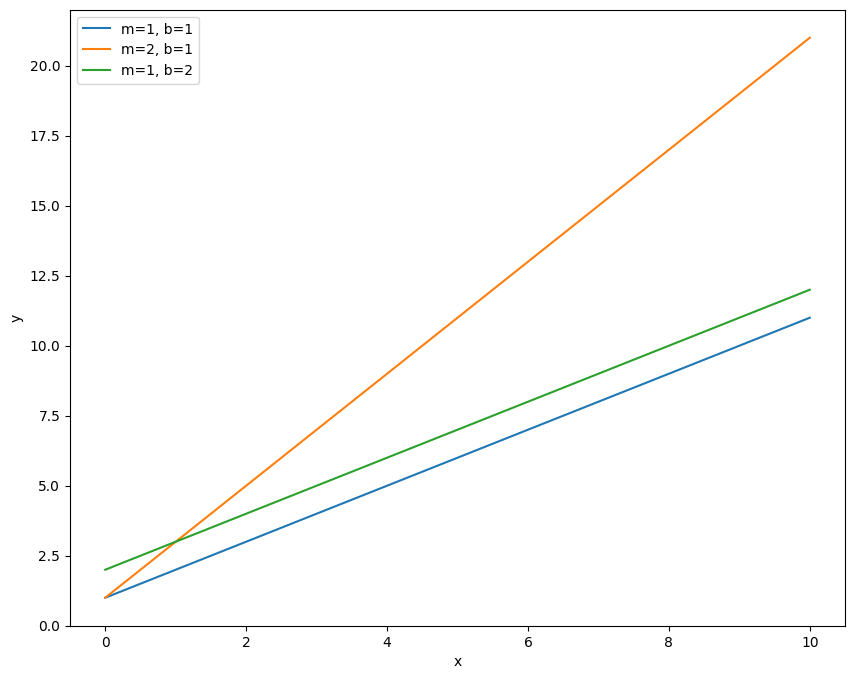

In [ ]:
x = np.linspace(0,10,100)
y = linear(x, 1,1)
y2 = linear(x, 2,1)
y3 = linear(x, 1,2)

plt.plot(x, y, label=('m=1, b=1'))
plt.plot(x, y2, label=('m=2, b=1'))
plt.plot(x, y3, label=('m=1, b=2'))

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

So this shows the three lines, plotted in order of blue, then orange, then green (the first three colors in the cycle). Notice how I've also included the 'label' keyword and the $\texttt{plt.legend}$ call. This allows us to label each line with some text and plot a legend so that we know what line corresponds to what data. Now let's change the default color cycle to one that is mapped to the Spectral color scheme.

In [ ]:
spectral = plt.get_cmap('Spectral') #first we need to load up the colar map
new_cycle = [spectral(k) for k in np.linspace(0,1,7)] #this turns the continuous gradient you saw above into 7 discreet, evenly spaced colors

matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=new_cycle) #this sets the new color cycle

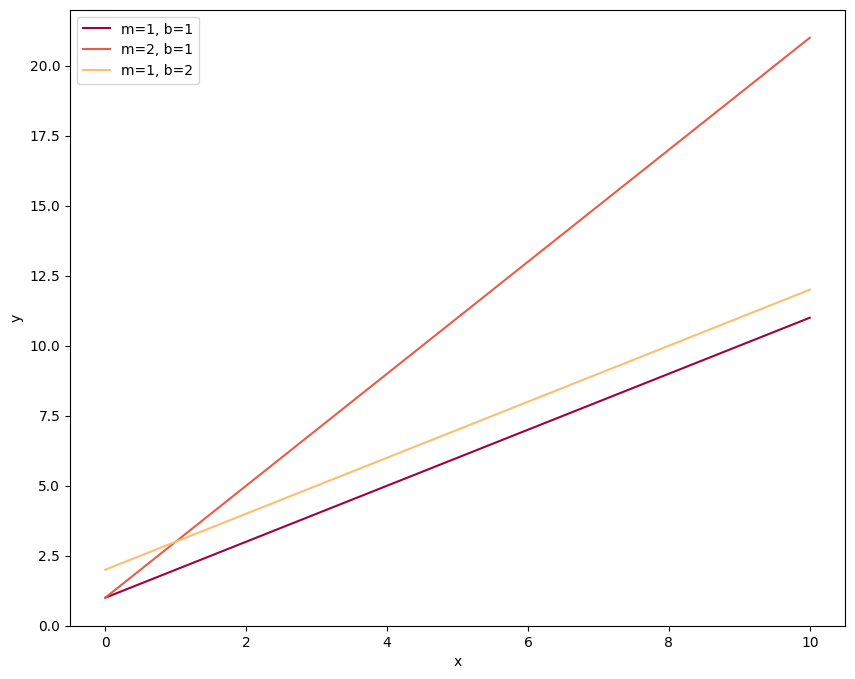

In [ ]:
x = np.linspace(0,10,100)
y = linear(x, 1,1)
y2 = linear(x, 2,1)
y3 = linear(x, 1,2)

plt.plot(x, y, label=('m=1, b=1'))
plt.plot(x, y2, label=('m=2, b=1'))
plt.plot(x, y3, label=('m=1, b=2'))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Same plot, new colors! Since we've changed the color cycle in the $\texttt{rcParams}$ function, this will be the cycle throughout the rest of the notebook unless we specify otherwise. For example let's load in our exoplanet data and make some histograms:

In [ ]:
cat = pd.read_csv('./transiting_planets.csv')

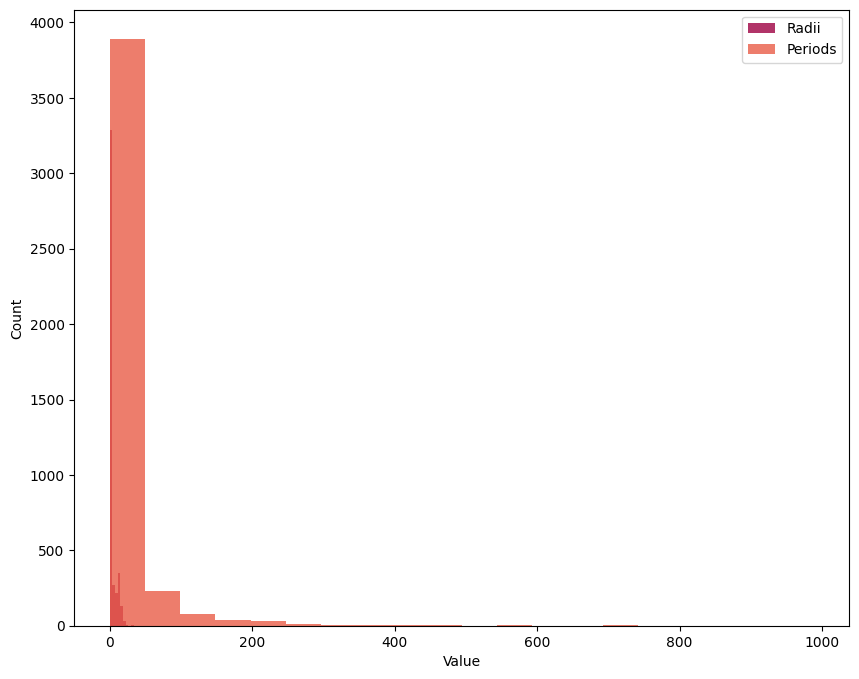

In [ ]:
plt.hist(cat['radius'], label='Radii', bins=20, alpha=0.8)
plt.hist(cat['period'], label='Periods', bins=20, alpha=0.8)

plt.xlabel('Value')
plt.ylabel('Count')

plt.legend()
plt.show()

The $\texttt{alpha}$ keyword sets data transparency, which can be helpful when showing a lot of information that overlaps.

### Fonts

The default font for $\texttt{matplotlib}$ is DejaVu Sans. Usually, this is fine for things like academic publications and presentations. No one is gonna hold it against you for using it. But if you want to up your plot game, having fonts that match your article or presentation's font is easy to do. The trick is making sure that python knows where to find fonts that you have installed. And it might say it has fonts in one place, but then look somewhere else entirely when it's looking for the font you asked for. Let's look for DejaVu Sans first, the font we know it's using:

In [ ]:
matplotlib.font_manager.findfont("DejaVu Sans")

'/usr/local/lib/python3.11/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

That's the directory on your machine where python is looking for fonts to use in $\texttt{matplotlib}$. So if you want to use a different font, you have to make sure its files are in that directory.

In case the font you want wasn't in the directory, we'd have to download the files (many fonts can be found for free on Google), add it to the folder, and then clear the cache (the working memory) from $\texttt{matplotlib}$ by first finding where it is on your machine, deleting that file, and rerunning your notebook. Don't worry, when it can't find the cache file, python will automatically create a new one.

In [ ]:
print(matplotlib.get_cachedir())

/root/.cache/matplotlib


There are many fonts that are available naturally in python. Let's take a look at what is natively available in Google Colab:

In [ ]:
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

A font that I commonly want to use is the Computer Modern (cm) font used by $\LaTeX$, since that's the language my articles are written in. You might want to use Times New Roman or some other serif font for your academic publications and presentations. When you set the $\texttt{rcParams}$ font family to 'serif' as you've seen in previous notebooks, the font that is being used is Computer Modern. Let's load Computer Modern explicitly though:

In [ ]:
matplotlib.font_manager.findfont('cmr10') #just proving that it does exist in a place python can see it

'/usr/local/lib/python3.11/dist-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf'

In [ ]:
plt.rcParams['font.family'] = 'cmr10'
plt.rcParams['axes.formatter.use_mathtext'] = True #using mathematical symbols

Now let's see the new font in our plots:

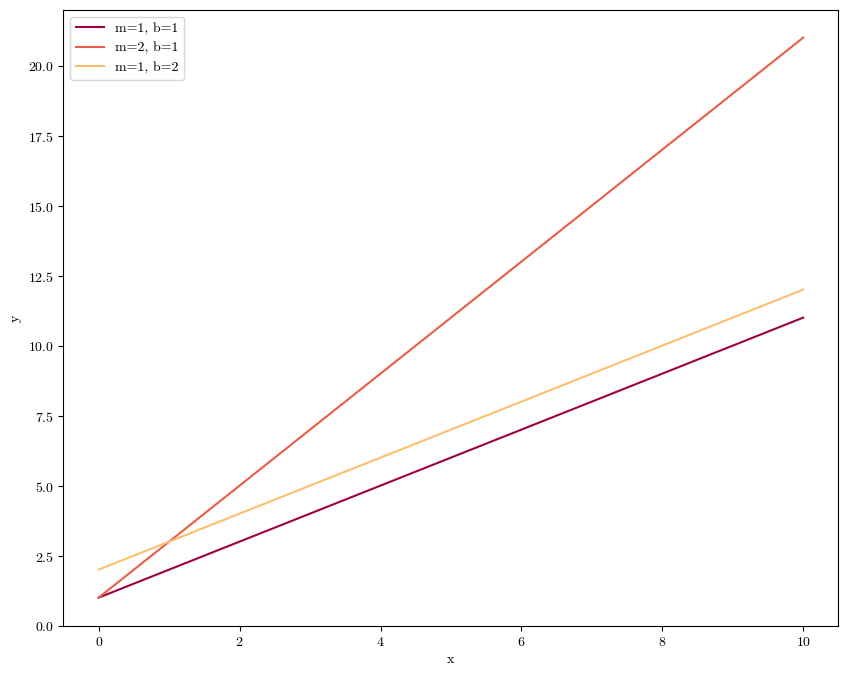

In [ ]:
x = np.linspace(0,10,100)
y = linear(x, 1,1)
y2 = linear(x, 2,1)
y3 = linear(x, 1,2)

plt.plot(x, y, label=('m=1, b=1'))
plt.plot(x, y2, label=('m=2, b=1'))
plt.plot(x, y3, label=('m=1, b=2'))

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

## Plot Readability

It's important to make sure that your plots convey as much information as possible with as much clarity and simplicity as possible. Make sure you always have axes labels, legends where applicable, colorscales where applicable, and any other in-plot labels that might be useful. Let's go back to our exoplanet data for example:



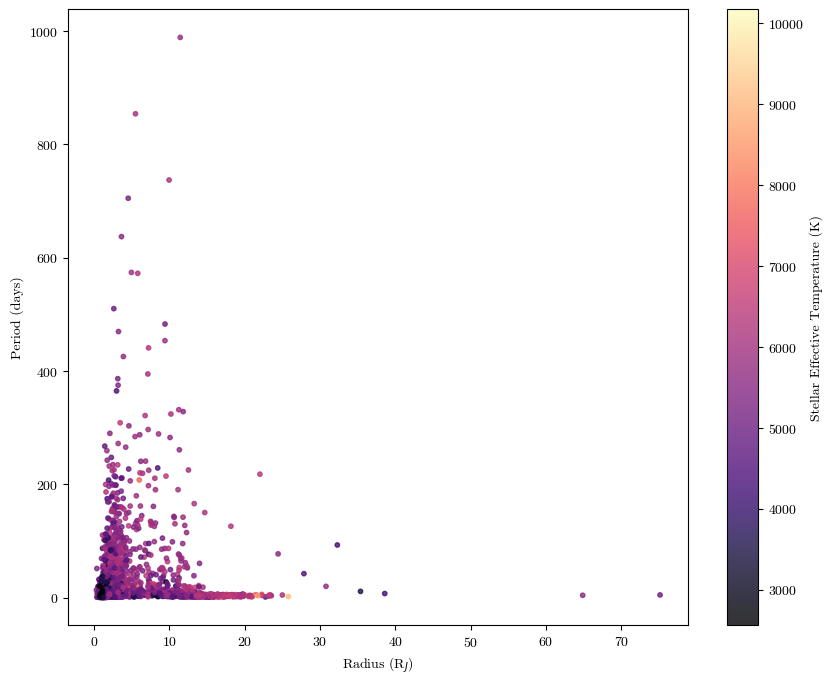

In [ ]:
plt.scatter(cat['radius'], cat['period'], c=cat['steff'], cmap='magma', alpha=0.8, s=10)

plt.xlabel('Radius (R$_J$)')
plt.ylabel('Period (days)')

plt.colorbar(label='Stellar Effective Temperature (K)')

plt.show()

Sometimes you might have data that covers a large range of orders of magnitude (factors of 10). To have it all represented clearly (versus all bunched up in a corner or with large amounts of white space), it might help to set one or both axes scales to logarithmic.

In [ ]:
import astropy.units as u #astropy has a handy units module; I'm importing it here to convert the stellar radii into meters (from Solar radii)

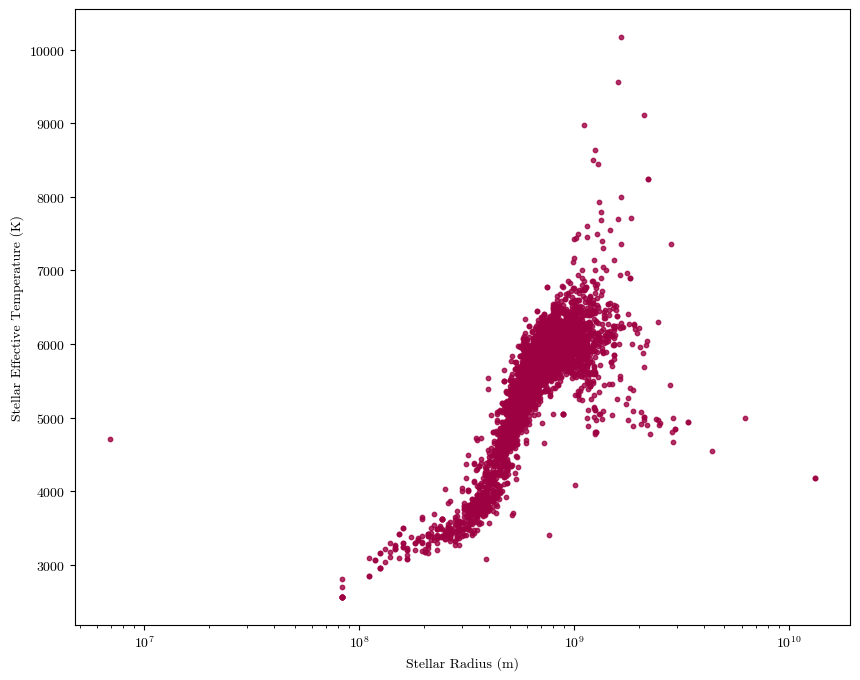

In [ ]:
plt.scatter(cat['sradius']*u.R_sun.to(u.m), cat['steff'], alpha=0.8, s=10)

plt.xlabel('Stellar Radius (m)')
plt.ylabel('Stellar Effective Temperature (K)')

plt.xscale('log')


plt.show()

Also be sure to label your data and create usable legends. For example, let's color the dots by discovery technique from a larger data table:

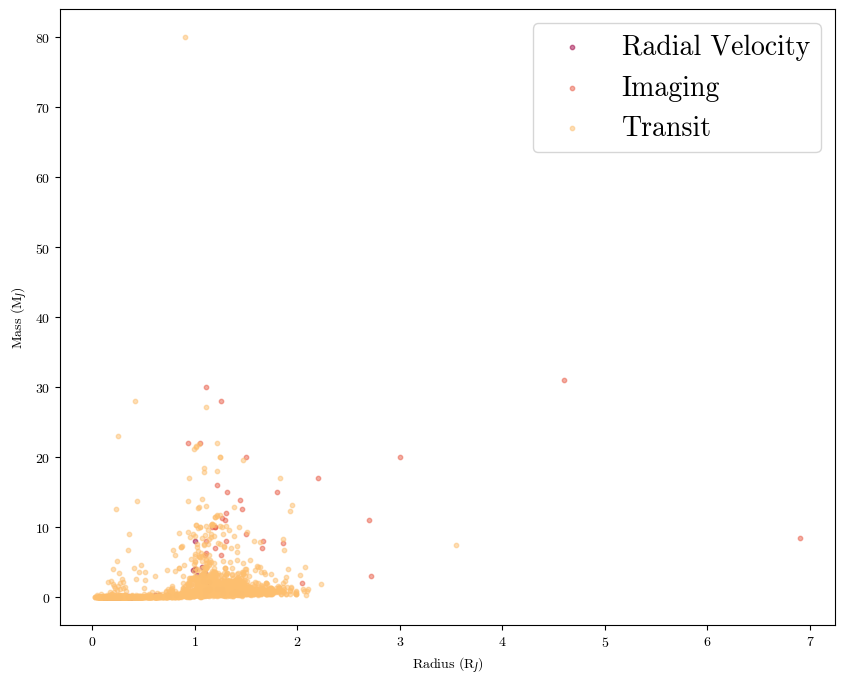

In [ ]:
planets = pd.read_csv('./planets_extended.csv', comment='#') #data from the NASA Exoplanet Archive; had to put in the comment keyword bc the first 40 lines are just descriptions of the data columns

plt.scatter(planets[planets['discovery method'] == 'Radial Velocity']['radius'], planets[planets['discovery method'] == 'Radial Velocity']['mass'], label='Radial Velocity', s=10, alpha=0.5)
plt.scatter(planets[planets['discovery method'] == 'Imaging']['radius'], planets[planets['discovery method'] == 'Imaging']['mass'], label='Imaging', s=10, alpha=0.5)
plt.scatter(planets[planets['discovery method'] == 'Transit']['radius'], planets[planets['discovery method'] == 'Transit']['mass'], label='Transit', s=10, alpha=0.5)

plt.xlabel('Radius (R$_J$)')
plt.ylabel('Mass (M$_J$)')

plt.legend(fontsize=20) #we call this so that the data labels we have set in the scatter commands are shown; plt.legend() has keywords you can set within the parenthesis for things like location, font size, and background color
plt.show()

## More Complex Plotting Techniques

### Plotting Error Bars

When possible, try to communicate the errors on your measurements. In $\texttt{matplotlib}$ this can be kind of finicky - you need to first plot the datapoints, then overplot the error bars. Let's load in a larger data table for exoplanets that includes error bars (among other things we'll use later).

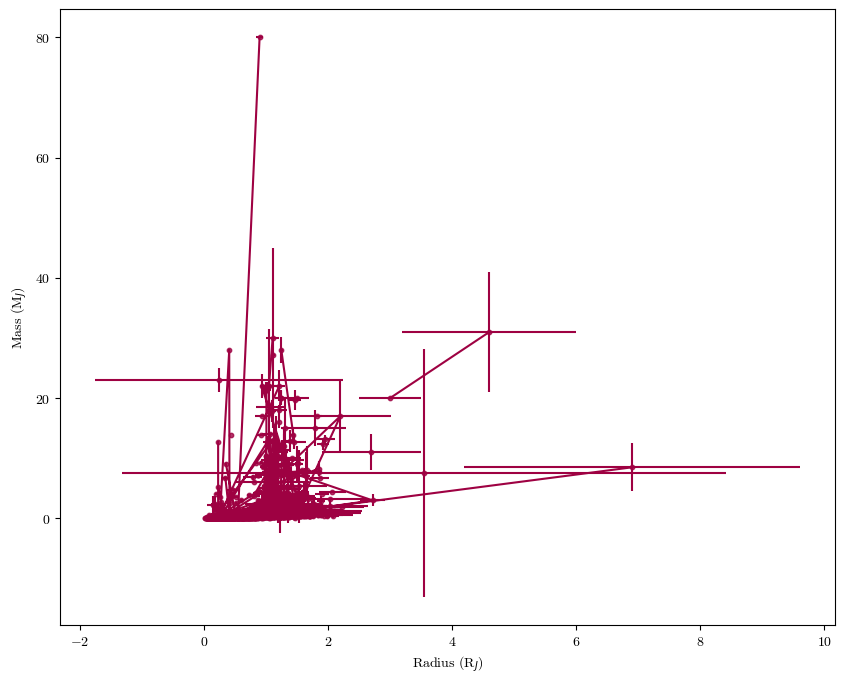

In [ ]:
plt.scatter(planets['radius'], planets['mass'], s=10, alpha=0.8)
plt.errorbar(planets['radius'], planets['mass'], xerr=planets['radius up err'], yerr=planets['mass up err'])

plt.xlabel('Radius (R$_J$)')
plt.ylabel('Mass (M$_J$)')

plt.show()

### Subplots

Sometimes you might want to show multiple plots next to each other. That's where the subplot feature in $\texttt{matplotlib}$ comes in.

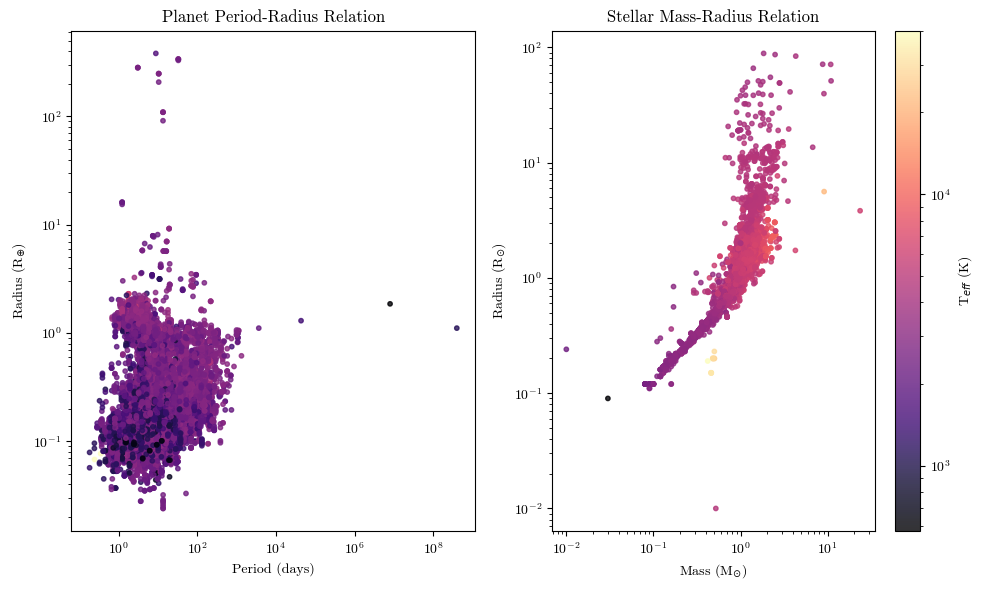

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6)) #plotting two figures defined by ax1 and ax2 in a grid that is 1 row long and 2 columns wide; you can also just say fig, ax =, and call the specific figure by ax[i,j]

#to plot to each specific figure, you call [name] = ax#.scatter(...); we need to set the image equal to a variable so that we have what is known as a 'mappable object' for the colorbar further down
im1 = ax1.scatter(planets['period'], planets['radius'], c=planets['steff'], cmap='magma', s=10, alpha=0.8, norm=matplotlib.colors.LogNorm()) #the norm keyword to set the colors to LogNorm is because we have a wide range of OOMs for the stellar temperatures
im2 = ax2.scatter(planets['smass'], planets['sradius'], c=planets['steff'], cmap='magma', s=10, alpha=0.8, norm=matplotlib.colors.LogNorm())

#to set the axis labels, titles, and etc, you do similarly to if you had a single plot; call the specific ax#, but we use 'set_' commands
ax1.set_xlabel('Period (days)')
ax2.set_xlabel('Mass (M$_{\odot}$)')

ax1.set_ylabel('Radius (R$_{\oplus}$)')
ax2.set_ylabel('Radius (R$_{\odot}$)')

ax1.set_title('Planet Period-Radius Relation')
ax2.set_title('Stellar Mass-Radius Relation')

#after making the plot initially, I noticed that the data was kind of bunched up; so I'm going to set the axes scales to logarithmic
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.set_xscale('log')
ax2.set_yscale('log')

#since the color of each dot is the same, I'm only going to show one colorbar
fig.colorbar(im2, ax=ax2, label='T$_{eff}$ (K)')

plt.tight_layout() #this just makes sure that the layout of the plots is efficiently using the space

### Twinned Axes

What if you want to show two different datasets on the same plot, but with different axes visible? Often, this is what the Hertzsprung-Russell Diagram looks like: on its x-axes (top and bottom), it'll have temperature and spectral type or color. On its y-axes (left and right) it'll have luminosity and absolute magnitude. Let's make a HR diagram ourselves using the $\texttt{twin}$ axes function.

In [ ]:
planets.columns

Index(['name', 'hostname', 'sys pl num', 'discovery method', 'disc year',
       'period', 'period up err', 'period low err', 'radius', 'radius up err',
       'radius low err', 'mass', 'mass up err', 'mass low err', 's spec type',
       'steff', 'steff up err', 'steff low err', 'sradius', 'sradius up err',
       'sradius low err', 'smass', 'smass up err', 'smass low err', 'slum',
       'slum up err', 'slum low err', 'distance', 'abs mag'],
      dtype='object')

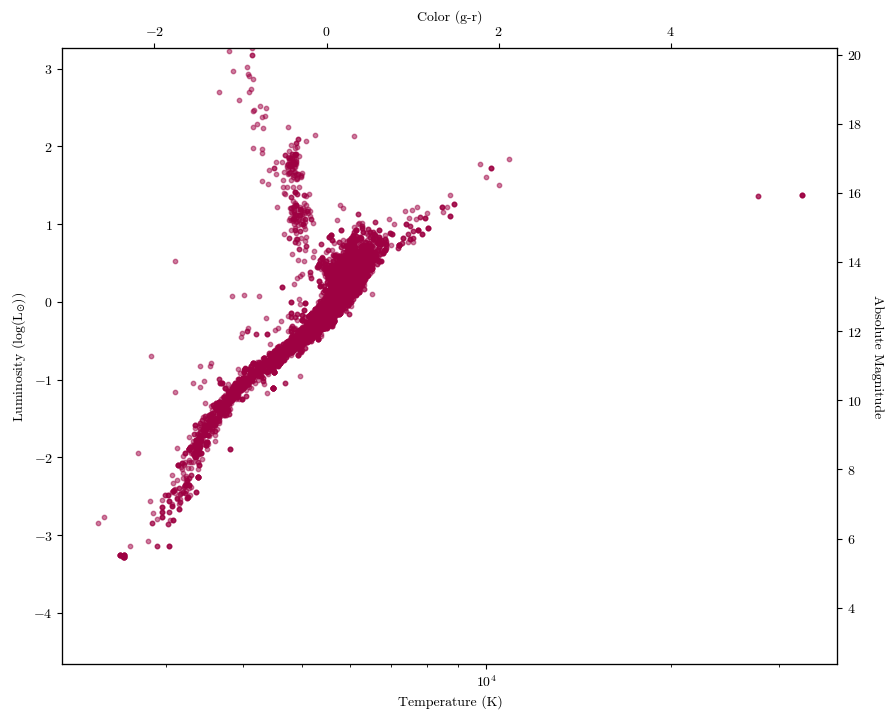

In [ ]:
fig, ax1 = plt.subplots()

ax1.scatter(planets['steff'], planets['slum'], s=10, alpha=0.5)

ax1.set_xlabel('Temperature (K)')
ax1.set_ylabel('Luminosity (log(L$_{\odot}$))')
ax1.set_ylim(planets['slum'].min(), planets['slum'].max())

ax1.set_xscale('log')

ax2 = ax1.twinx() #we need to set two additional axes objects if we want the axis label to show up
ax3 = ax2.twiny()

ax3.set_xlabel('Color (g-r)')
ax3.set_xlim(-3.07, 5.94) #this I got off a larger version of the table
ax2.set_ylabel('Absolute Magnitude', rotation=270, labelpad=15) #the rotation key wordrotates the access label, but when it does so the words are too close to the tick labels; the labelpad keyword scoots the axis label over
ax2.set_ylim(planets['abs mag'].min(), planets['abs mag'].max())

plt.show()

# Other plotting packages

Sometimes, $\texttt{matplotlib}$ can be frustrating to work with, especially for some of the more complex types of plots. Luckily, there are other plotting packages out there that have more 'bells and whistles' built in for easier use.

## Seaborn

I really like the $\texttt{seaborn}$ plotting package. It makes beautiful plots out the gate, and can easily add useful annotations and visualizations to basic plots to make them more readable.

In [ ]:
import seaborn as sns

print(planets.columns)
planets

Index(['name', 'hostname', 'sys pl num', 'discovery method', 'disc year',
       'period', 'period up err', 'period low err', 'radius', 'radius up err',
       'radius low err', 'mass', 'mass up err', 'mass low err', 's spec type',
       'steff', 'steff up err', 'steff low err', 'sradius', 'sradius up err',
       'sradius low err', 'smass', 'smass up err', 'smass low err', 'slum',
       'slum up err', 'slum low err', 'distance', 'abs mag'],
      dtype='object')


,name,hostname,sys pl num,discovery method,disc year,period,period up err,period low err,radius,radius up err,...,sradius up err,sradius low err,smass,smass up err,smass low err,slum,slum up err,slum low err,distance,abs mag
0,11 Com b,11 Com,1,Radial Velocity,2007,326.03000,0.32,-0.32,NaN,NaN,...,2.00,-2.00,2.70,0.30,-0.30,2.243,0.071,-0.085,93.1846,4.44038
1,11 Com b,11 Com,1,Radial Velocity,2007,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.60,0.40,-0.30,NaN,NaN,NaN,93.1846,4.44038
2,11 Com b,11 Com,1,Radial Velocity,2007,323.21000,0.06,-0.05,NaN,NaN,...,2.85,-2.45,2.09,0.64,-0.63,1.978,0.180,-0.159,93.1846,4.44038
3,11 UMi b,11 UMi,1,Radial Velocity,2009,516.21997,3.20,-3.20,NaN,NaN,...,2.84,-2.84,2.78,0.69,-0.69,NaN,NaN,NaN,125.3210,4.56216
4,11 UMi b,11 UMi,1,Radial Velocity,2009,516.22000,3.25,-3.25,NaN,NaN,...,1.84,-1.84,1.80,0.25,-0.25,NaN,NaN,NaN,125.3210,4.56216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38111,ups And d,ups And,3,Radial Velocity,1999,1276.46000,0.57,-0.57,NaN,NaN,...,NaN,NaN,1.30,NaN,NaN,NaN,NaN,NaN,13.4054,3.98687
38112,ups Leo b,ups Leo,1,Radial Velocity,2021,385.20000,2.80,-1.30,NaN,NaN,...,3.15,-0.45,1.48,0.90,-0.38,1.800,0.221,-0.055,52.5973,4.03040
38113,xi Aql b,xi Aql,1,Radial Velocity,2007,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.40,0.20,-0.20,NaN,NaN,NaN,56.1858,4.42501
38114,xi Aql b,xi Aql,1,Radial Velocity,2007,136.75000,0.25,-0.25,NaN,NaN,...,NaN,NaN,2.20,NaN,NaN,1.839,NaN,NaN,56.1858,4.42501


This table has waaaay more data. It contains the name of the planet, the number of planets in the system, the discovery method, the discovery year, the orbital period in days with error bars, the planet radius in Jupiter radii with error bars, the planet mass in Jupiter masses with error bars, the star's effective temperature in Kelvin with error bars, the star's radius in Solar radii with error bars, the star's mass in Solar masses with error bars, and the distance to the planet with error bars.

We'll make a scatter plot of this data where each data point is both colored and shaped according to the discovery method:

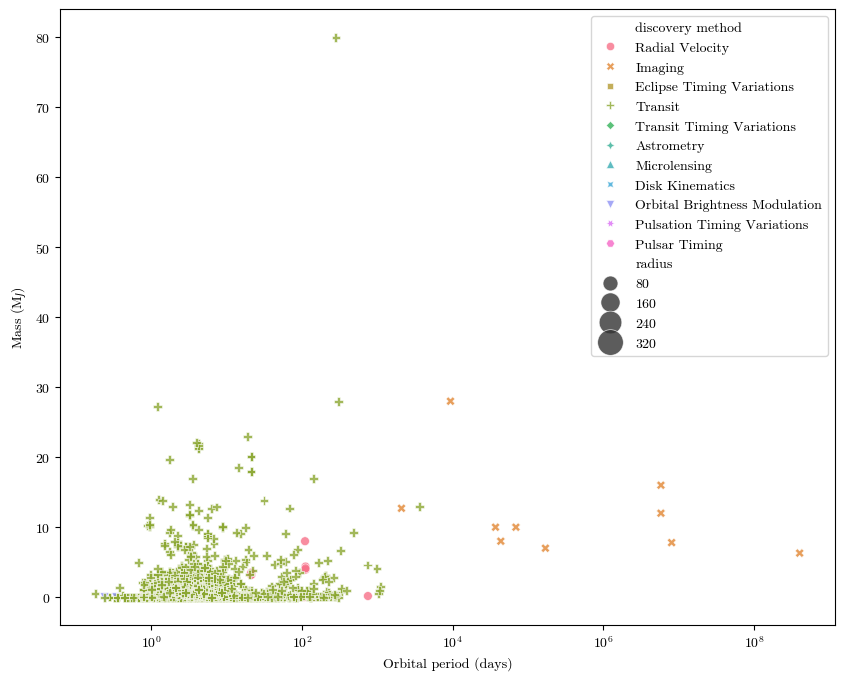

In [ ]:
sns.scatterplot(x="period", #what the x axis data is
                y="mass", #what the y axis data is
                hue="discovery method", #how to color the data points
                size="radius", #what metric on which to determine how large each data point should be (larger planets will have larger dots)
                sizes=(40,400), #setting a range for dot sizes, otherwise they're kinda hard to see
                style="discovery method", #what shape each point will be
                alpha=0.8, #transparency
                data=planets) #the pandas table from which we're getting all this data

plt.xlabel('Orbital period (days)')
plt.ylabel('Mass (M$_J$)')

plt.xscale('log')
plt.show()

## Bokeh

What if you want to showcase your plots online with interactive features? The $\texttt{bokeh}$ package has got you covered! You've actually seen some $\texttt{bokeh}$ plots before on your course webpage. Let remake the same plot as above in $\texttt{bokeh}$. It (unfortunately) takes some more doing to get the interactive features, but check out the [package webpage](https://docs.bokeh.org/en/latest/index.html) for well-documented how-tos.

In [ ]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import HoverTool
#import bokeh.models.markers
from bokeh.embed import file_html, components
from bokeh.transform import factor_mark, factor_cmap, linear_cmap

output_notebook()

In [ ]:
planets = sns.load_dataset("planets") #I'm going to load in the simpler version of our planets data table from the seaborn sample datasets. Same NASA info, just cleaned a bit

In [ ]:
planets.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [ ]:
def plotter(data):
    fig = figure(width=800, height=800, tools="pan,wheel_zoom,box_zoom,reset", x_axis_type="log")
    fig_markers = [fig.circle, fig.circle_dot, fig.star, fig.star_dot, fig.square, fig.square_dot, fig.triangle,
                   fig.inverted_triangle, fig.hex, fig.asterisk]
    factors = ['Radial Velocity', 'Imaging', 'Eclipse Timing Variations', 'Transit', 'Astrometry',
               'Transit Timing Variations', 'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
               'Pulsation Timing Variations']

    for i in range(10):
        source = data[data['method'] == factors[i]]
        planet_plot = fig_markers[i]("orbital_period", "distance", source=source, size=15, legend_group="method",
                                     fill_alpha=0.4, color=factor_cmap('method', 'Spectral10', factors))
        hover = HoverTool(tooltips=[('Mass (M_J)', '@mass')])

    fig.add_tools(hover)

    fig.legend.click_policy = 'hide'

    fig.xaxis.axis_label = 'Orbital Period (days)'
    fig.yaxis.axis_label = 'Distance (AU)'
    output_file('planets.html')
    show(fig)

In [ ]:
plotter(planets)

You can zoom in and pan around data, hide certain planets, and hover over data points to see more information in this plot. It can also be saved as an HTML file in order to upload it to webpages.

# Accessibility Considerations

We'll spend the last part of this notebook discussing a couple of things you can do to make your data visualizations more accessible and ADA compliant.

## Summarize

When writing or presenting, be sure to summarize what is happening in your plot in the text or in your spoken words. Describe the axes, the data being shown, and the overall trend that the audience should understand from your plot.

## Simplify

It's easy to forget that you are the expert in what you are talking about! Even other people in your field might not understand all of the nuances of the data you are presenting. When writing or talking about your data, be sure to simplify it where possible, and consider how to best describe or incorporate complicated datasets.

## Make Data Available (When Possible)

If possible, make your data available in tabular formats after publication. This will allow people who access the data to display it on their own terms.

## Consider Colors and Patterns

We can't just rely on color alone to distinguish between different elements of a data visualization if we want to be completely accessible. It's important to make sure that people with different forms of color blindness are able to read a plot that uses color as a way of distinguishing data. There are a couple of ways we can do this. I would recommend downloading an app like [Color Oracle](https://colororacle.org/) or [Sim Daltonism](https://michelf.ca/projects/sim-daltonism/), which can simulate common and rare forms of colorblindness on your screen. Color Oracle will change the entire screen, while Sim Daltonism can just put a little filtering window over a portion of your screen:

![](https://drive.google.com/uc?id=1F2h5yBA4pKtnJYZgyE_7HOJI4Yd5QOrM)

![](https://drive.google.com/uc?id=1JrN-Om6A8L7aEIK4snHwAPcqP8wLeY5P)

So we can see that the color scheme I used in a notebook from yesteryear isn't very red-green colorblind-friendly, but that the color scheme used in another example is. $\texttt{seaborn}$ has a color palette called "colorblind" that is optimized for this. Another thing we could do though is change markers or patterns used to help differentiate. In a scatter plot, this is accomplished by setting the "style" argument to what is also getting the color.

In [ ]:
# Load the example mpg dataset and a necessary tool
mpg = sns.load_dataset("mpg")
import scipy.stats as stats

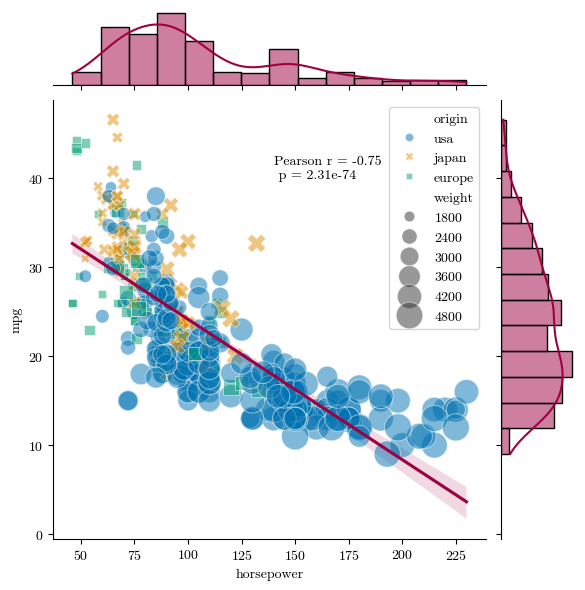

In [ ]:
g = sns.jointplot(x="horsepower", y="mpg", kind='reg', data=mpg, scatter=False, palette='colorblind')
sns.scatterplot(x="horsepower", y="mpg", hue="origin", size="weight", palette='colorblind', style="origin",
            sizes=(40, 400), alpha=.5, data=mpg, ax=g.ax_joint) #the jointplot function doesn't want to take size or hue as inputs, so we're going to join a scatter plot to this one

pr = stats.pearsonr(mpg['horsepower'].fillna(0), mpg['mpg'].fillna(0))
plt.text(140, 40, 'Pearson r = {:.2f} \n p = {:.2e}'.format(pr[0], pr[1]))
plt.show()

Not only have we set a more colorblind-friendly palette, we've also made sure that the different data points have different shapes. We can also set different patterns for color patches by assigning a "hatch" keyword.

In [ ]:
mpg_pivot = pd.pivot_table(mpg, index='origin', columns='mpg', values='horsepower')
mpg_pivot['Totals'] = mpg_pivot.sum(axis=1)

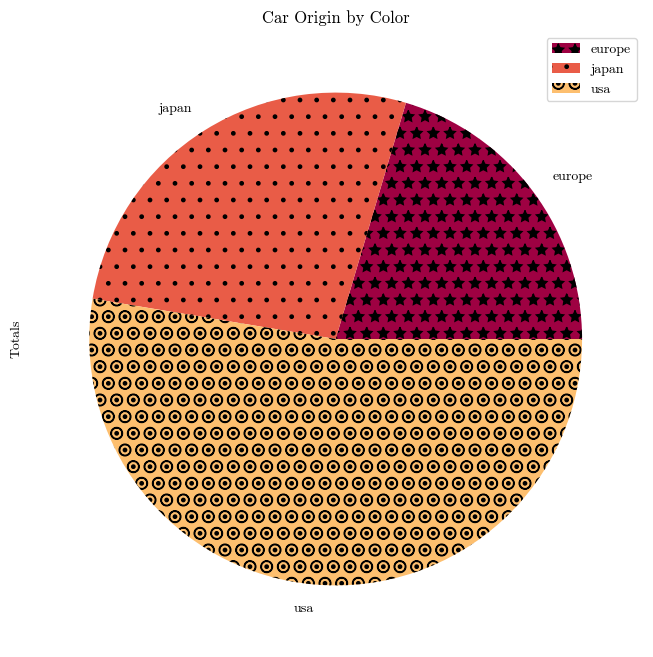

In [ ]:
mpg_pivot.plot.pie(y='Totals', title='Car Origin by Color', hatch=['*', '.', 'O.', '|'])
plt.show()